In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep= '\t')
data.shape

C:\Users\alain\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(320772, 162)

In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop_duplicates(subset='code', inplace = True)
data.shape

(320639, 162)

In [5]:
colomn_to_delete = data.columns[data.notnull().mean(axis=0) < 0.01]

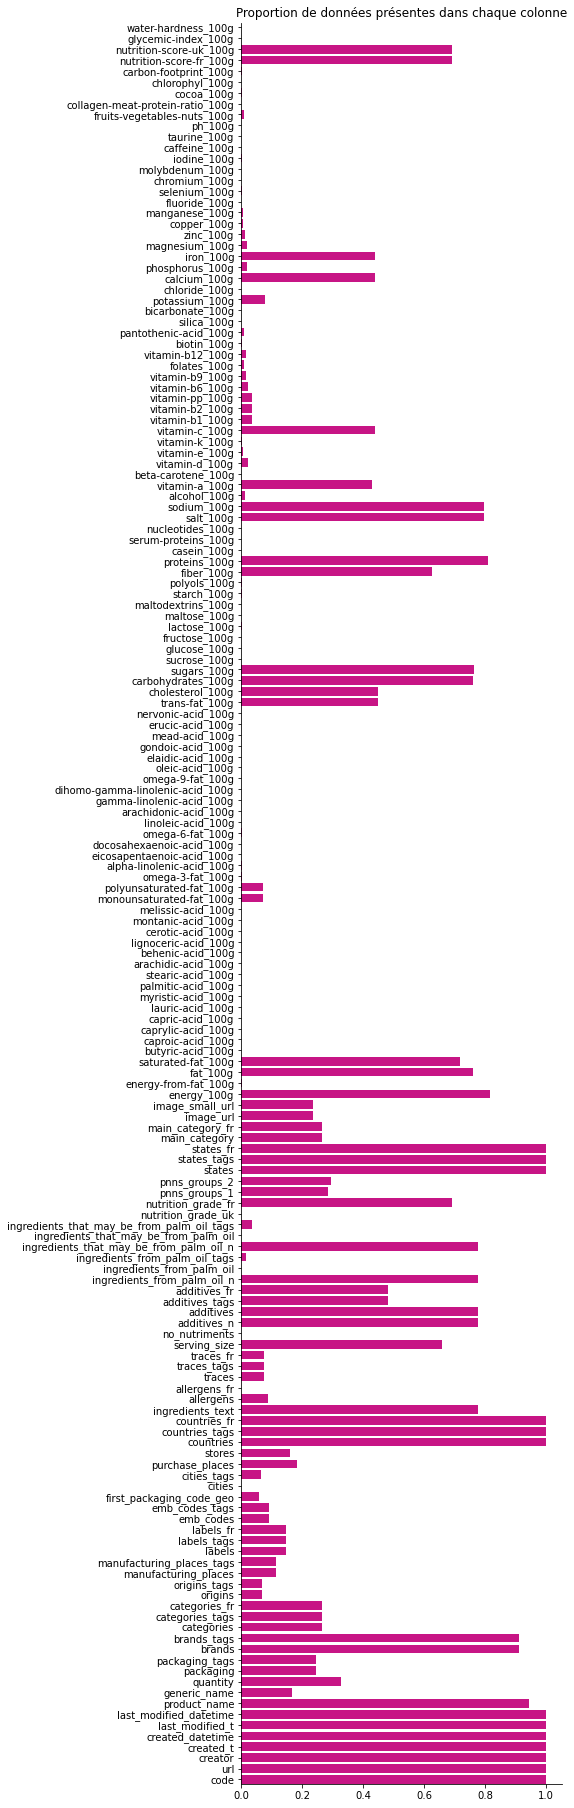

In [6]:
# Proportion de valeurs présentes par colonne
remplissage = data.notnull().mean(axis=0)

# barplot des valeurs présentes par colonne
fig = plt.figure(figsize=(8,25))
plt.barh(np.arange(len(remplissage)),remplissage, color="mediumvioletred")
plt.yticks(np.arange(len(remplissage)),remplissage.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)
plt.tight_layout()
plt.title('Proportion de données présentes dans chaque colonne')
plt.show()

In [7]:
data.drop(columns=colomn_to_delete, inplace=True)

In [151]:
n//3

29

In [147]:
data.iloc[:, : n//3]

,code,url
0,3087,http://world-fr.openfoodfacts.org/produit/0000...
1,4530,http://world-fr.openfoodfacts.org/produit/0000...
2,4559,http://world-fr.openfoodfacts.org/produit/0000...
3,16087,http://world-fr.openfoodfacts.org/produit/0000...
4,16094,http://world-fr.openfoodfacts.org/produit/0000...
...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...


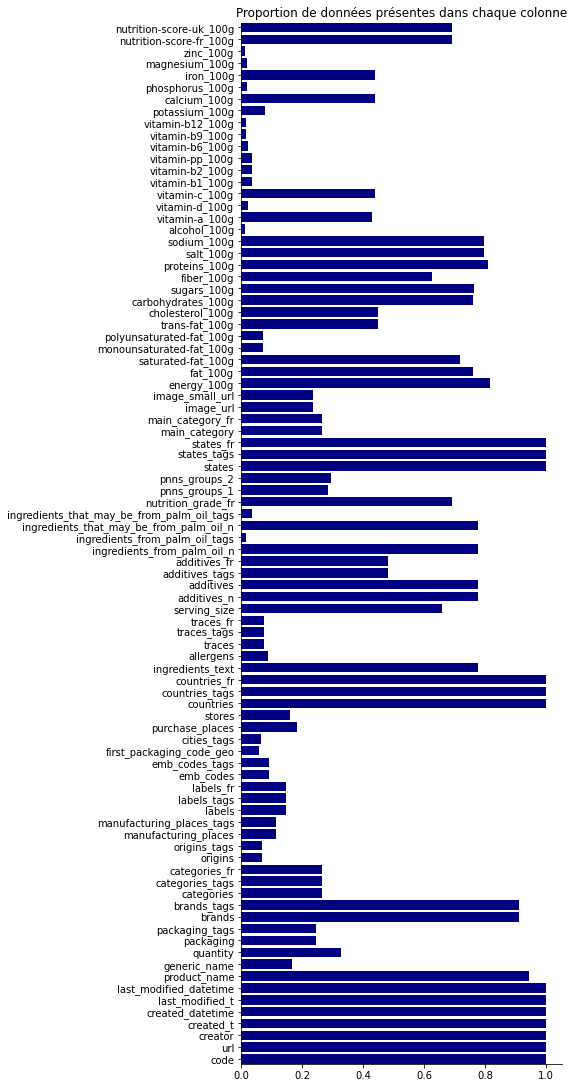

In [155]:
# Proportion de valeurs présentes par colonne
n = data.shape[1] 
remplissage = data.notnull().mean(axis=0)

# barplot des valeurs présentes par colonne
fig = plt.figure(figsize=(8,15))
plt.barh(np.arange(len(remplissage)),remplissage, color="navy")
plt.yticks(np.arange(len(remplissage)),remplissage.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)
plt.tight_layout()
plt.title('Proportion de données présentes dans chaque colonne')
plt.show()

In [88]:
df_selected = data[
    ['energy_100g', 'iron_100g', 'saturated-fat_100g', 'fat_100g', 'sugars_100g',
    'carbohydrates_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'nutrition_grade_fr']].copy()

In [89]:
df_selected = df_selected.dropna(subset=["nutrition_grade_fr"])

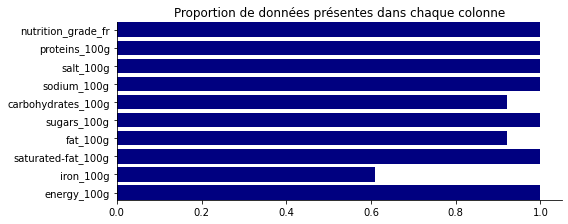

In [95]:
# Proportion de valeurs présentes par colonne
remplissage = df_selected.notnull().mean(axis=0)

# barplot des valeurs présentes par colonne
fig = plt.figure(figsize=(8,3))
plt.barh(np.arange(len(remplissage)),remplissage, color="navy")
plt.yticks(np.arange(len(remplissage)),remplissage.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)
plt.tight_layout()
plt.title('Proportion de données présentes dans chaque colonne')
plt.show()

In [96]:
num_columns = df_selected.select_dtypes(include=[np.number]).columns
med = df_selected[num_columns].median()

# On complète les valeurs manquantes de notre jdd par la médiane pour les valeurs numériques
df_selected = df_selected.fillna(med)

In [97]:
df_selected = df_selected[
    (df_selected.energy_100g < 3700) & 
    (df_selected['saturated-fat_100g'] <= df_selected.fat_100g ) &
    (df_selected.sugars_100g <= df_selected.carbohydrates_100g) & (df_selected.sugars_100g <= 100) &
    (df_selected.sodium_100g <= df_selected.salt_100g) &
    (df_selected.fat_100g + df_selected.carbohydrates_100g + df_selected.proteins_100g + df_selected.salt_100g <= 100)]

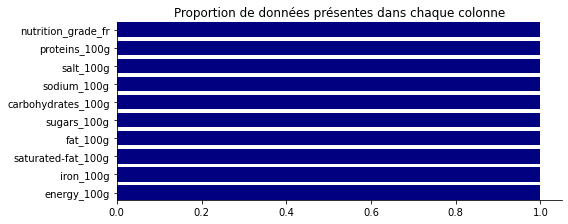

In [99]:
# Proportion de valeurs présentes par colonne
remplissage = df_selected.notnull().mean(axis=0)

# barplot des valeurs présentes par colonne
fig = plt.figure(figsize=(8,3))
plt.barh(np.arange(len(remplissage)),remplissage, color="navy")
plt.yticks(np.arange(len(remplissage)),remplissage.index,rotation=0, fontsize=10)
sns.despine()
plt.margins(y=0)
plt.tight_layout()
plt.title('Proportion de données présentes dans chaque colonne')
plt.show()

# Model de prédiction basique avec un K_NN

## 1 ere étape diviser notre JDD en 2, un pour l'entrainement, un pour tester les résultats

In [102]:
from sklearn.model_selection import train_test_split

X = df_selected.drop(columns=["nutrition_grade_fr"])
y = df_selected["nutrition_grade_fr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2 ème étape : normaliser les données

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

## 3 ème étape : entraîner le model

In [105]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisez le classifieur KNN
knn = (n_neighbors=len(df_selected['nutrition_grade_fr'].unique()))
KNeighborsClassifier
# Entraînez le modèle sur les données d'entraînement
knn.fit(X_test_normalized, y_train)

# Évaluez la performance du modèle sur les données de test
accuracy = knn.score(X_test_normalized, y_test)
print("Accuracy :", accuracy)

Accuracy : 0.8325756125574273


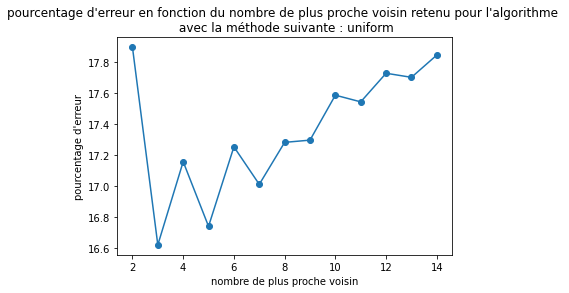

In [127]:
import matplotlib.pyplot as plt

errors = []

for k in range(2,15):
    knn = KNeighborsClassifier(k, weights='uniform')
    errors.append(100*(1 - knn.fit(X_train_normalized, y_train).score(X_test_normalized, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.title('pourcentage d\'erreur en fonction du nombre '
          'de plus proche voisin retenu pour l\'algorithme \n avec la méthode suivante : uniform')
plt.xlabel('nombre de plus proche voisin')
plt.ylabel('pourcentage d\'erreur')
plt.show()

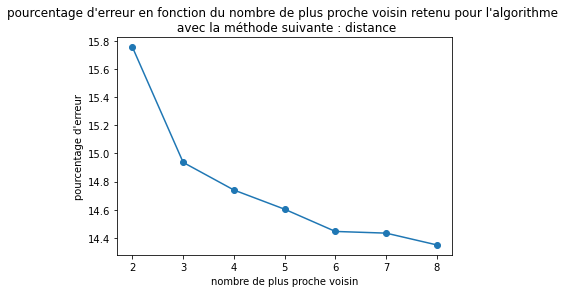

In [122]:
import matplotlib.pyplot as plt

errors = []

for k in range(2,9):
    knn = KNeighborsClassifier(k, weights='distance')
    errors.append(100*(1 - knn.fit(X_train_normalized, y_train).score(X_test_normalized, y_test)))
plt.plot(range(2,9), errors, 'o-')
plt.title('pourcentage d\'erreur en fonction du nombre '
          'de plus proche voisin retenu pour l\'algorithme \n avec la méthode suivante : distance')
plt.xlabel('nombre de plus proche voisin')
plt.ylabel('pourcentage d\'erreur')
plt.show()

In [123]:
res = knn.predict(X_test_normalized)

In [126]:
(np.array(res) == np.array(y_test)).mean()

0.8565036370597243

In [108]:
y_test.head(20)

211130    d
195940    d
35625     e
1728      b
83995     d
165251    b
110662    a
5503      b
83148     c
205318    e
177990    e
142936    d
233495    d
201410    d
154330    a
3804      a
82066     e
290918    e
208196    e
303291    e
Name: nutrition_grade_fr, dtype: object